In [1]:
import numpy 
import matplotlib.pyplot as plt
import imageio 
import numpy as np 

/var/folders/4h/zj5kynxn2nqgm4gqbgxhlf8r0000gp/T/ipykernel_63933/3623159127.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('2010SK0961.tif')


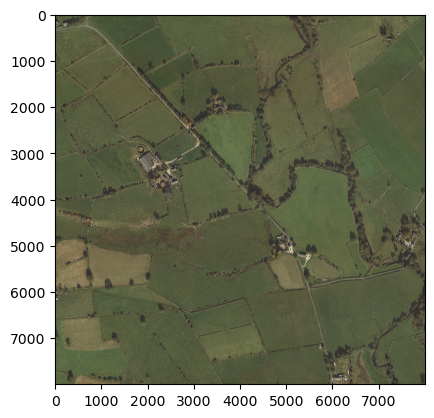

In [2]:

# Load the TIFF file
image = imageio.imread('2010SK0961.tif')

# Display basic information about the image
#print('Image shape:', image.shape)
#print('Image data type:', image.dtype)

# Show the image (optional)
plt.imshow(image)


/var/folders/4h/zj5kynxn2nqgm4gqbgxhlf8r0000gp/T/ipykernel_63933/606992972.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image2 = imageio.imread('2020SK0961.tif')


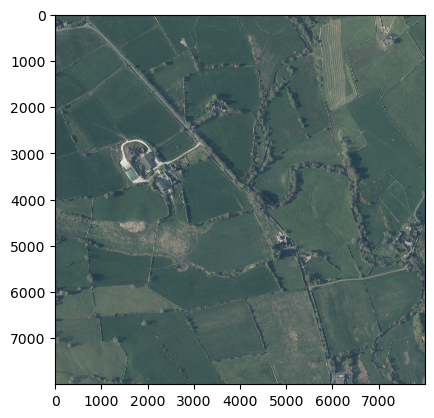

In [3]:
image2 = imageio.imread('2020SK0961.tif')
plt.imshow(image2)

/var/folders/4h/zj5kynxn2nqgm4gqbgxhlf8r0000gp/T/ipykernel_63933/1710762376.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image3 = imageio.imread('SK0961_CM.tif')


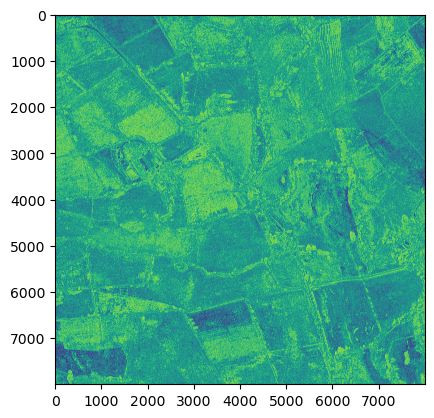

In [8]:
image3 = imageio.imread('SK0961_CM.tif')
plt.imshow(image3)

In [9]:
M = image.shape[0]//16
N = image.shape[1]//16

In [10]:
tiles = [image[x:x+M,y:y+N] for x in range(0,image.shape[0],M) for y in range(0,image.shape[1],N)]
tiles2 = [image2[x:x+M,y:y+N] for x in range(0,image2.shape[0],M) for y in range(0,image2.shape[1],N)]
tiles3 = [image3[x:x+M,y:y+N] for x in range(0,image3.shape[0],M) for y in range(0,image3.shape[1],N)]

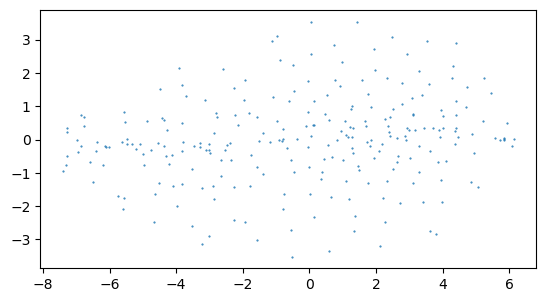

In [11]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([_.reshape(-1, 1).squeeze() for _ in tiles])
model = TSNE(n_components=2, random_state=0)
y = model.fit_transform(X) 

fig, ax = plt.subplots()

ax.plot(y[:, 0], y[:, 1], 'o', ms=0.5)
ax.set_aspect('equal')

In [25]:
matrices = np.array(tiles)

In [26]:
matrices_1d = np.array([matrix.flatten() for matrix in tiles])

In [27]:
import numpy as np
from sklearn.cluster import KMeans



# Reshape the matrices into a 1D array of length 9
matrices_1d = np.array([matrix.flatten() for matrix in tiles])

# Define the number of clusters (in this case, 200)
num_clusters = 10

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)






# Fit the KMeans model to the data
from sklearn.cluster import MiniBatchKMeans

# Define the number of clusters and the size of the minibatches

batch_size = 64

# Initialize the minibatch k-means model
kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=batch_size)

# Fit the model to the 1D matrices
kmeans.fit(matrices_1d)

# Get the cluster labels for each matrix
cluster_labels = kmeans.labels_

# Create a dictionary to store the matrices in each cluster
clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(matrices[i])

# Select one matrix from each cluster to create the final cluster of 200 matrices
final_cluster = []
for label, matrix_list in clusters.items():
    final_cluster.append(matrix_list[0])
    if len(final_cluster) == num_clusters:
        break

/Users/nurulabedin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
np.array(final_cluster).shape

(10, 500, 500, 3)

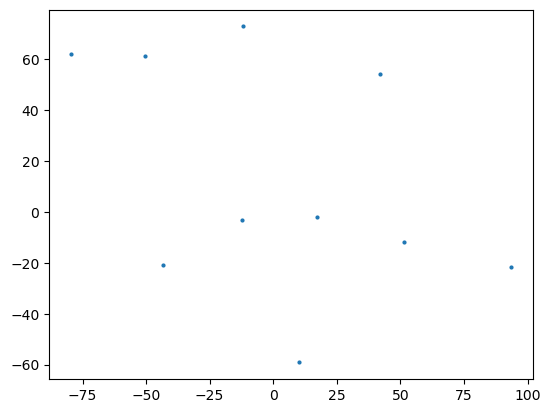

In [29]:
perplexity = 4
import numpy as np
from sklearn.manifold import TSNE
X = np.array([_.reshape(-1, 1).squeeze() for _ in final_cluster])
model = TSNE(n_components=2, random_state=0,perplexity=perplexity)
y = model.fit_transform(X) 

fig, ax = plt.subplots()

ax.plot(y[:, 0], y[:, 1], 'o', ms=2)
ax.set_aspect('equal')

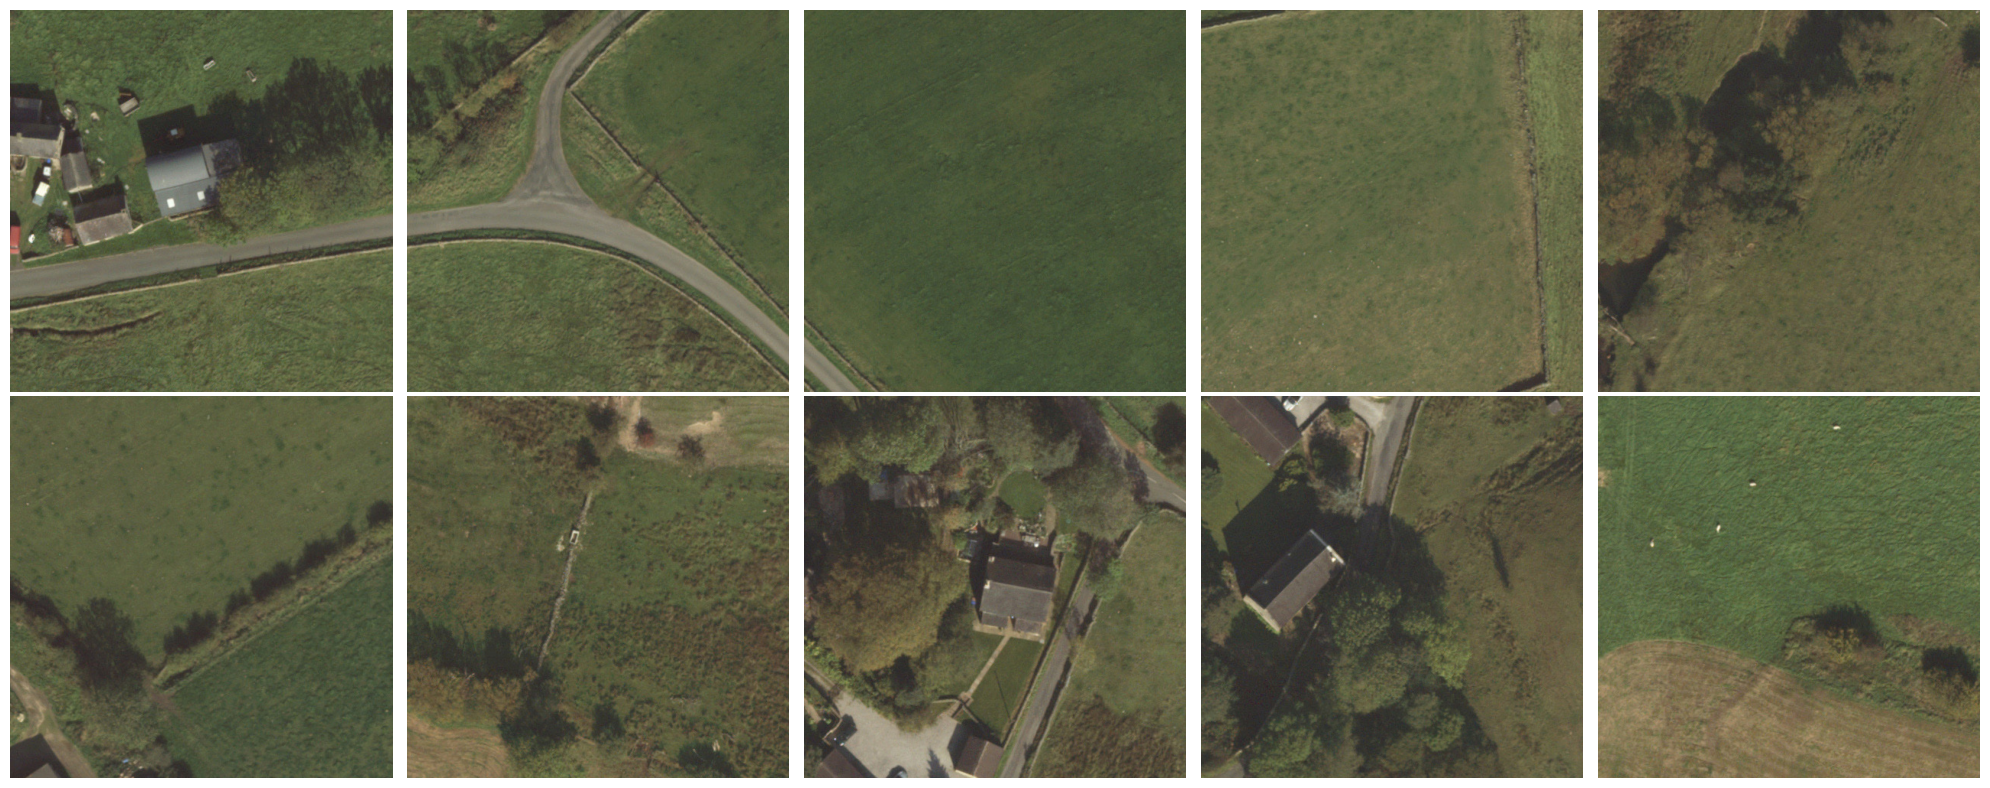

In [30]:
import matplotlib.pyplot as plt

# Assuming you have a list of image arrays 'final_cluster'

num_images = len(final_cluster)
rows = 2
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 8))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        data = final_cluster[i].reshape(500, 500, -1)
        ax.imshow(data)
    ax.axis('off')

plt.tight_layout()
plt.savefig('image.png')
plt.show()


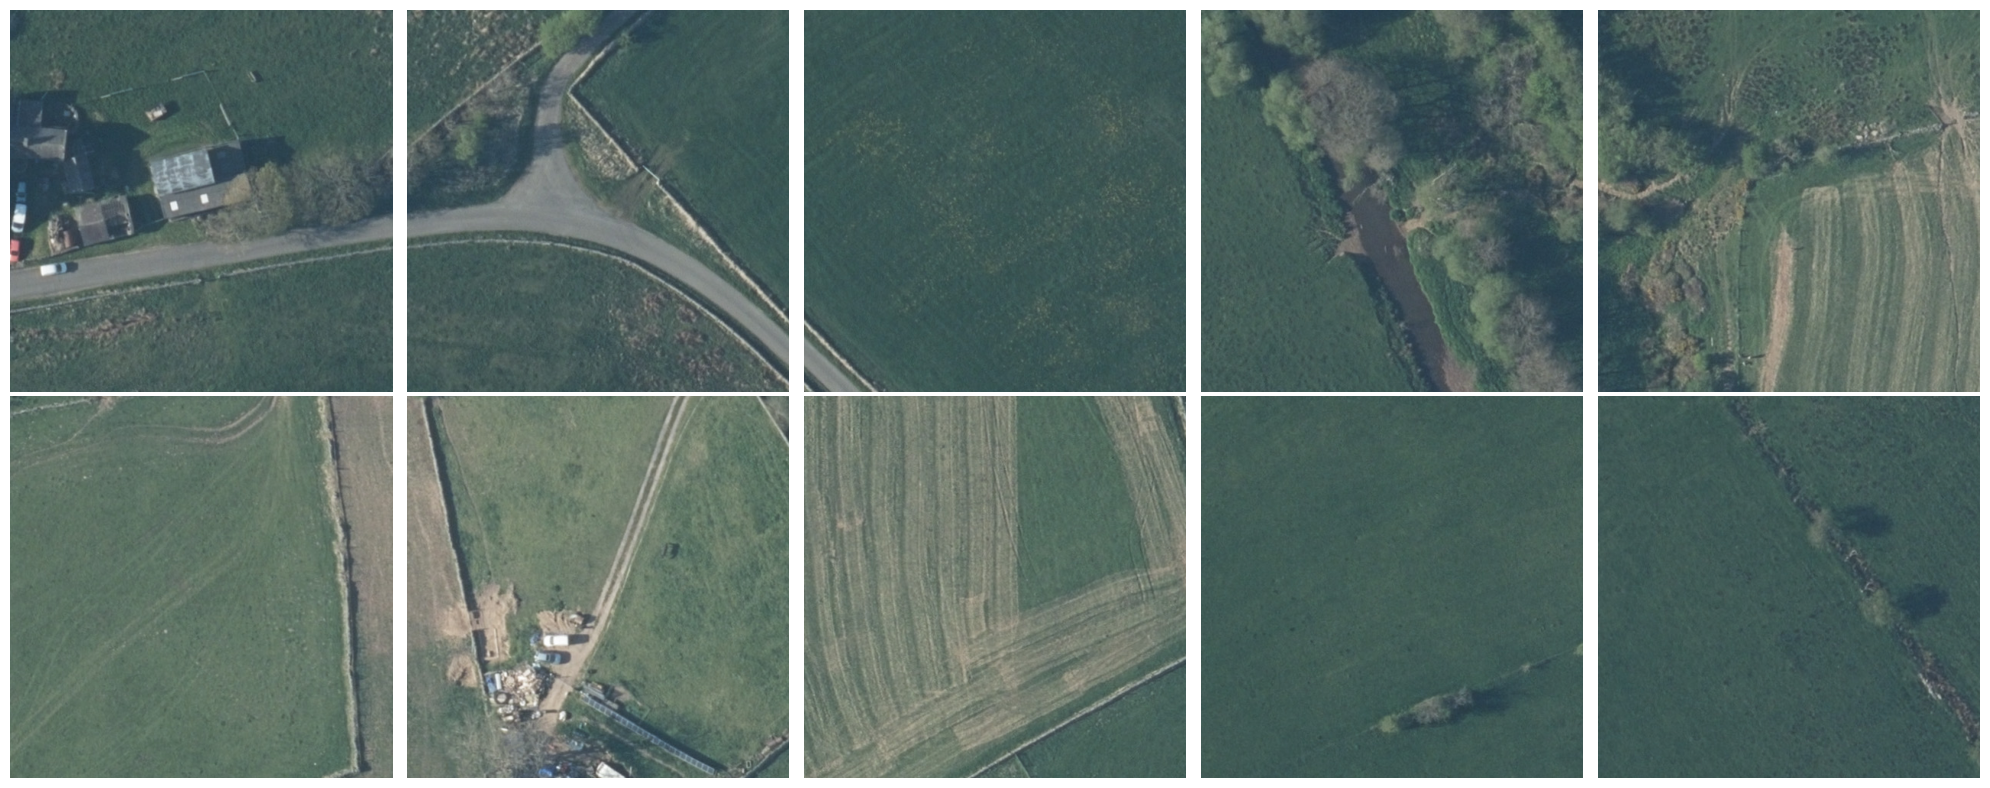

In [18]:
import matplotlib.pyplot as plt

# Assuming you have a list of image arrays 'final_cluster'

num_images = len(final_cluster)
rows = 2
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 8))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        data = final_cluster[i].reshape(500, 500, -1)
        ax.imshow(data)
    ax.axis('off')

plt.tight_layout()
plt.savefig('image.png')
plt.show()